In [65]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage.filters import threshold_otsu
import seaborn as sns
from skimage.color import rgb2gray
from skimage.morphology import convex_hull_image
from scipy.spatial import ConvexHull
from skimage.measure import label, regionprops
from skimage.draw import polygon,rectangle,polygon_perimeter
import math
import csv
import os
import sklearn
import pandas as pd
from scipy.stats import f_oneway
from itertools import combinations
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression


In [3]:
file_path = r"data_2\dataset.csv"
data = pd.read_csv(file_path)

In [4]:
data.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8
0,0.184,106401.5980,103157.1785,1293.4311,592,1150,0.7705,0.2313
1,0.184,106399.9771,103155.4379,1293.4311,592,1150,0.7705,0.2313
2,0.184,106399.9771,103155.4379,1293.4311,592,1150,0.7705,0.2313
3,0.184,106400.7710,103156.2771,1293.4311,592,1150,0.7705,0.2313
4,0.184,106402.8029,103158.1105,1293.4311,592,1150,0.7705,0.2313


In [5]:
data.tail()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8
295,0.1387,92597.5043,90066.2099,1181.6302,449,1093,0.7577,0.1645
296,0.1386,92571.9423,90039.6155,1181.6302,449,1093,0.7579,0.1644
297,0.1386,92571.9423,90039.6155,1181.6302,449,1093,0.7579,0.1644
298,0.1387,92597.5043,90066.2099,1181.6302,449,1093,0.7577,0.1645
299,0.1386,92571.9423,90039.6155,1181.6302,449,1093,0.7579,0.1644


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  300 non-null    float64
 1   Feature2  300 non-null    float64
 2   Feature3  300 non-null    float64
 3   Feature4  300 non-null    float64
 4   Feature5  300 non-null    int64  
 5   Feature6  300 non-null    int64  
 6   Feature7  300 non-null    float64
 7   Feature8  300 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 18.9 KB


In [7]:
data.shape

(300, 8)

In [8]:
data.isnull().sum()

Feature1    0
Feature2    0
Feature3    0
Feature4    0
Feature5    0
Feature6    0
Feature7    0
Feature8    0
dtype: int64

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Feature1,300.0,0.152698,0.020580,0.1121,0.1410,0.1548,0.166800,0.1903
Feature2,300.0,96826.305201,6497.177463,83528.1779,93554.2273,97513.0050,101489.859200,108193.5226
Feature3,300.0,92651.430769,5500.413412,80950.3309,90039.6155,93062.3804,95713.572500,103158.1105
Feature4,300.0,1215.729927,42.300775,1156.8513,1176.8997,1233.7962,1256.129100,1293.4311
Feature5,300.0,466.726667,37.045465,412.0000,449.0000,463.0000,469.000000,592.0000
Feature6,300.0,1122.213333,34.962682,1080.0000,1086.0000,1141.0000,1149.000000,1174.0000
Feature7,300.0,0.758105,0.012816,0.7294,0.7486,0.7535,0.769500,0.7897
Feature8,300.0,0.184671,0.028877,0.1298,0.1671,0.1866,0.204725,0.2399


In [10]:
import matplotlib.pyplot as plt

def ploty(x, y, size1=10, size2=1.5, interval=10, title="plotting", x_ticks_positions=90):
    """
    Function to plot x vs. y with customizable figure size, x-tick positions, and axis labels.
    
    Parameters:
    - x: x-axis data
    - y: y-axis data
    - size1: Width of the plot
    - size2: Height of the plot
    - interval: Interval for x-tick positions
    - title: Title of the plot
    - x_ticks_positions: Rotation angle for x-axis labels
    """
    # Create a single plot
    plt.figure(figsize=(size1, size2*2))
    
    # Plot the data
    plt.plot(x, y)
    total_data_points = len(x)
    interval = total_data_points // interval
    x_ticks = x[::interval]  # Calculate positions for x-ticks
    plt.xticks(ticks=x_ticks, rotation=x_ticks_positions)  # Rotate x-axis labels
    
    # Add labels, legend, and title
    if hasattr(y, 'columns'):  # Check if y has column names
        plt.legend(y.columns)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(title)
    plt.grid()
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage
# Assuming x and y are defined:
# ploty(x, y)

In [11]:
data.columns

Index(['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6',
       'Feature7', 'Feature8'],
      dtype='object')

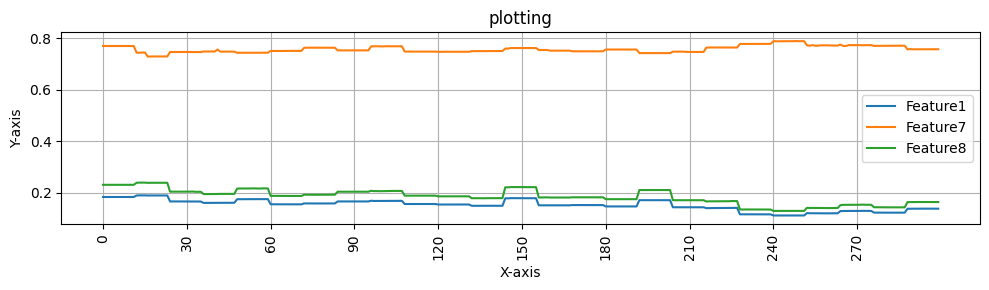

In [12]:
ploty(data.index,data[["Feature1","Feature7","Feature8"]])

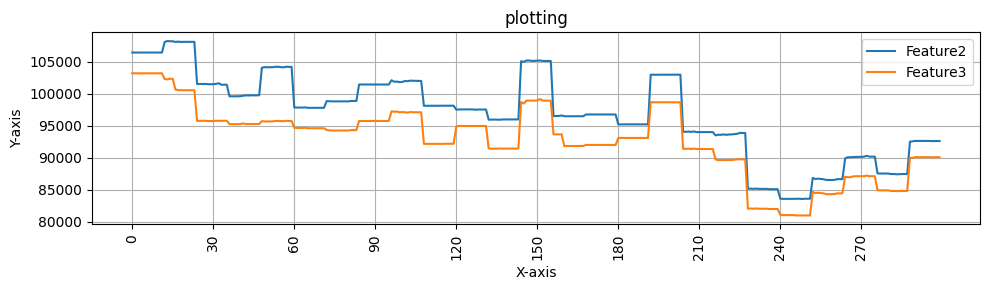

In [13]:
ploty(data.index,data[["Feature2","Feature3"]])

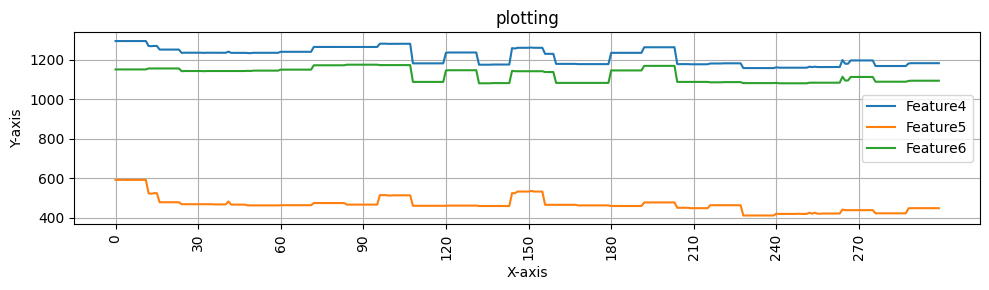

In [14]:
ploty(data.index,data[["Feature4","Feature5","Feature6"]])

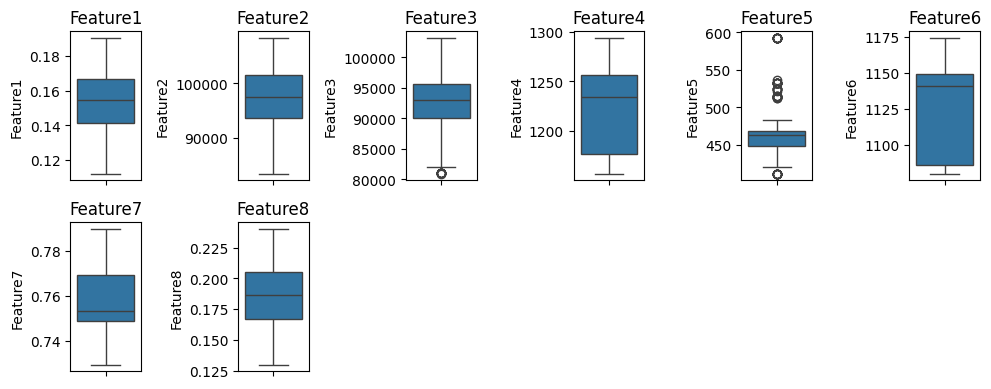

In [15]:
plt.figure(figsize=(10, 4))
for i, col in enumerate(data.columns, 1):
    plt.subplot(2, 6, i)
    sns.boxplot(y=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

<Axes: >

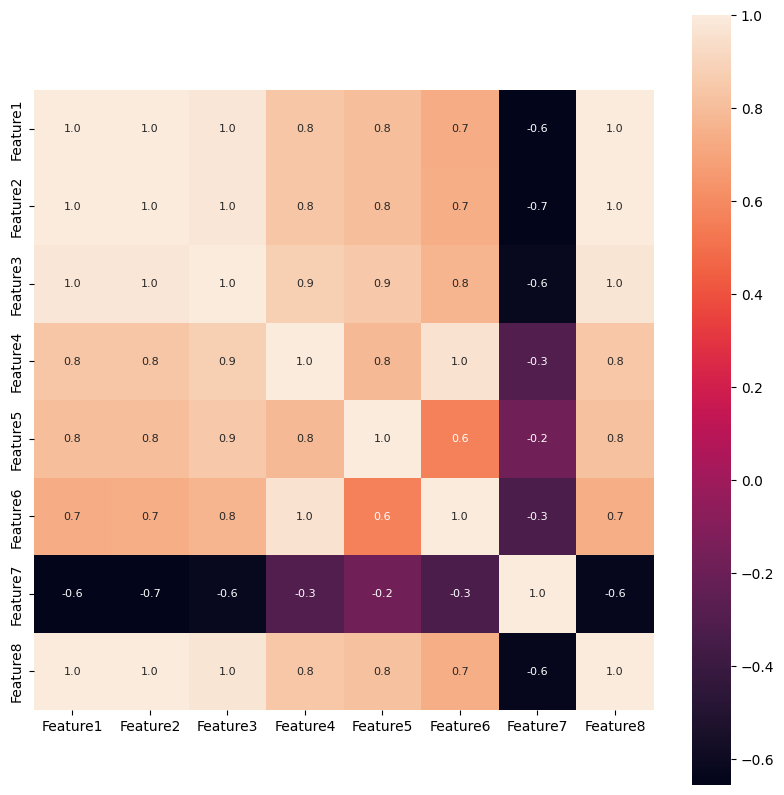

In [16]:
correlation = data.corr()
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8})
     

In [17]:
l:list = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6',
        'Feature8']


In [18]:
# Perform one-way ANOVA across all features
f_stat, p_value = f_oneway(*[data[col].values for col in l])

# Display results
print(f"F-Statistic: {f_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Significant differences exist between the features.")
else:
    print("No significant differences between the features.")

F-Statistic: 61240.95
P-Value: 0.0000
Significant differences exist between the features.


In [19]:
# Generate all unique pairs of columns from 'l'
pairwise_results:list = []
for feature1, feature2 in combinations(l, 2):
    # Perform t-test
    t_stat, p_value = ttest_ind(data[feature1], data[feature2])
    pairwise_results.append({
        'Feature Pair': f'{feature1} vs {feature2}',
        'T-statistic': t_stat,
        'P-value': p_value
    })

# Convert the results to a DataFrame
pairwise_results_df = pd.DataFrame(pairwise_results)

# Print the results
print(pairwise_results_df)

            Feature Pair  T-statistic        P-value
0   Feature1 vs Feature2  -258.124111   0.000000e+00
1   Feature1 vs Feature3  -291.753926   0.000000e+00
2   Feature1 vs Feature4  -497.731134   0.000000e+00
3   Feature1 vs Feature5  -218.145375   0.000000e+00
4   Feature1 vs Feature6  -555.868598   0.000000e+00
5   Feature1 vs Feature8   -15.616924   2.308055e-46
6   Feature2 vs Feature3     8.494373   1.580998e-16
7   Feature2 vs Feature4   254.878161   0.000000e+00
8   Feature2 vs Feature5   256.876119   0.000000e+00
9   Feature2 vs Feature6   255.129170   0.000000e+00
10  Feature2 vs Feature8   258.124026   0.000000e+00
11  Feature3 vs Feature4   287.917625   0.000000e+00
12  Feature3 vs Feature5   290.278126   0.000000e+00
13  Feature3 vs Feature6   288.214795   0.000000e+00
14  Feature3 vs Feature8   291.753826   0.000000e+00
15  Feature4 vs Feature5   230.718537   0.000000e+00
16  Feature4 vs Feature6    29.514826  8.118805e-119
17  Feature4 vs Feature8   497.717985   0.0000

Segregating the Data points as in terms of Annual indexing, asuming 8 frames per year (Please refer to resource 1)

In [ ]:
# Assuming your dataset is loaded in the variable data
# Example: data = pd.DataFrame(...)

# Generate the years based on the number of rows and rows per year
start_year = 1984
rows_per_year = 8
total_rows = len(data)

# Calculate the year for each row
years = [start_year + (i // rows_per_year) for i in range(total_rows)]

# Add the 'Year' column to the dataset
data['Year'] = years

# Print the first few rows to verify

data.tail()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Year
295,0.1387,92597.5043,90066.2099,1181.6302,449,1093,0.7577,0.1645,2020
296,0.1386,92571.9423,90039.6155,1181.6302,449,1093,0.7579,0.1644,2021
297,0.1386,92571.9423,90039.6155,1181.6302,449,1093,0.7579,0.1644,2021
298,0.1387,92597.5043,90066.2099,1181.6302,449,1093,0.7577,0.1645,2021
299,0.1386,92571.9423,90039.6155,1181.6302,449,1093,0.7579,0.1644,2021


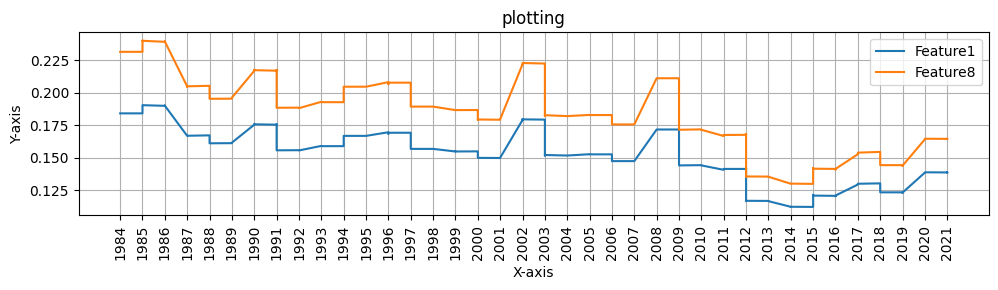

In [21]:
ploty(data["Year"],data[["Feature1","Feature8"]], interval=35)

Calculates and displays average annual rate of change for both periods

In [22]:
# Calculate year-over-year differences for features
data['Feature1_change'] = data['Feature1'].diff()
data['Feature8_change'] = data['Feature8'].diff()

# Filter data for 2012 to 2019 and 2019 to 2021
before_2019 = data[(data['Year'] >= 2002) & (data['Year'] < 2019)]
from_2019_to_2021 = data[(data['Year'] >= 2019) & (data['Year'] <= 2021)]

# Calculate average annual rate of change for both periods
before_avg_change_f1 = before_2019['Feature1_change'].mean()
from_avg_change_f1 = from_2019_to_2021['Feature1_change'].mean()

before_avg_change_f8 = before_2019['Feature8_change'].mean()
from_avg_change_f8 = from_2019_to_2021['Feature8_change'].mean()

# Display the results
print("Feature1 - Average Annual Rate of Change:")
print(f"2002-2019: {before_avg_change_f1:.4f}")
print(f"2019-2021: {from_avg_change_f1:.4f}\n")

print("Feature8 - Average Annual Rate of Change:")
print(f"2002-2019: {before_avg_change_f8:.4f}")
print(f"2019-2021: {from_avg_change_f8:.4f}")

Feature1 - Average Annual Rate of Change:
2002-2019: -0.0002
2019-2021: 0.0008

Feature8 - Average Annual Rate of Change:
2002-2019: -0.0003
2019-2021: 0.0010


Vizualizing the Health Change Over the Yaers of the Glacier

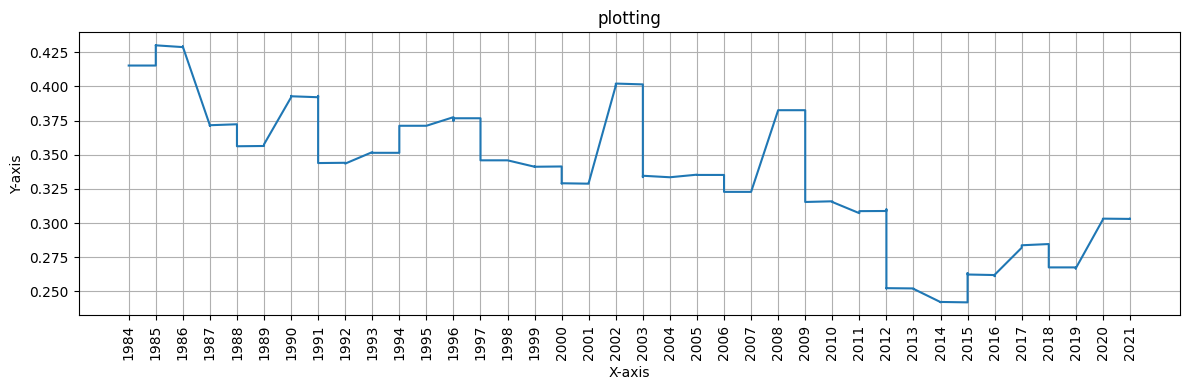

In [95]:
l1=list(data['Feature1'])

l2=list(data['Feature8'])

health=list(map(lambda x,y: np.mean(x+y), l1,l2))
ploty(data['Year'],health,interval=35,size2=2,size1=12)

 Calculates the rate of change (slope) of a glacial health metric over two periods, 2002-2019 and 2019-2021, by fitting a linear regression model to the data for each period. The slope of the regression line represents the rate of change. A t-test is then performed to compare the slopes of the two periods to determine if there is a statistically significant difference. If the p-value from the t-test is less than 0.05, the difference in slopes is significant, indicating a change in the glacial health metric between the two periods.

In [66]:
# Sample Data
data['Period'] = np.where(data['Year'] < 2019, '2002-2019', '2019-2021')

# Define a function to calculate the rate of change (slope)
def calculate_slope(years, values):
    reg = LinearRegression()
    reg.fit(years.values.reshape(-1, 1), values)
    return reg.coef_[0]

# Calculate slopes for each period
slopes = {}
for period in data['Period'].unique():
    subset = data[data['Period'] == period]
    slope = calculate_slope(subset['Year'], subset['Feature1'])  # Replace with glacial health metric
    slopes[period] = slope
    print(f"Rate of change for {period}: {slope:.4f}")

# Perform a t-test to compare slopes
slope_2002_2019 = slopes['2002-2019']
slope_2019_2021 = slopes['2019-2021']

t_stat, p_value = ttest_ind([slope_2002_2019], [slope_2019_2021], equal_var=False)
print(f"\nT-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")



Rate of change for 2002-2019: -0.0016
Rate of change for 2019-2021: 0.0089

T-statistic: nan, P-value: nan


Comparing the size of glaciers over two periods to see if their size has significantly reduced.

In [23]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming your DataFrame data has the following columns: ['Year', 'Feature1', 'Feature8']

# Filter data for 2002 to 2019 and 2019 to 2021
before_2019 = data[(data['Year'] >= 2002) & (data['Year'] < 2019)]
from_2019_to_2021 = data[(data['Year'] >= 2019) & (data['Year'] <= 2021)]

# Perform T-tests for Feature1 and Feature8
for feature in ['Feature1', 'Feature8']:
    t_stat, p_value = ttest_ind(before_2019[feature], from_2019_to_2021[feature], equal_var=False)
    print(f"{feature} T-test:")
    print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
    if p_value < 0.05:
        print(f"Result: Significant change in {feature} between 2002–2019 and 2019–2021.\n")
    else:
        print(f"Result: No significant change in {feature} between 2009–2019 and 2019–2021.\n")

Feature1 T-test:
T-statistic: 3.8126, P-value: 0.0003
Result: Significant change in Feature1 between 2002–2019 and 2019–2021.

Feature8 T-test:
T-statistic: 3.9771, P-value: 0.0002
Result: Significant change in Feature8 between 2002–2019 and 2019–2021.



Understanding if the rate at which glaciers are shrinking has accelerated after 2019.

In [24]:
# T-test for Feature1
t_stat_f1, p_value_f1 = ttest_ind(before_2019['Feature1_change'].dropna(), 
                                  from_2019_to_2021['Feature1_change'].dropna())
print(f"\nFeature1 T-test: T-statistic = {t_stat_f1:.4f}, P-value = {p_value_f1:.4f}")

# T-test for Feature8
t_stat_f8, p_value_f8 = ttest_ind(before_2019['Feature8_change'].dropna(), 
                                  from_2019_to_2021['Feature8_change'].dropna())
print(f"Feature8 T-test: T-statistic = {t_stat_f8:.4f}, P-value = {p_value_f8:.4f}")


Feature1 T-test: T-statistic = -0.7818, P-value = 0.4355
Feature8 T-test: T-statistic = -0.7294, P-value = 0.4669


Here is the difference between the two code snippets presented in a grid format:

| **Aspect**                 | **First Code Snippet**                                              | **Second Code Snippet**                                         |
|----------------------------|--------------------------------------------------------------------|----------------------------------------------------------------|
| **Focus**                  | Compares raw feature values between periods                      | Compares year-over-year rate of change (`diff()`) between periods |
| **Comparison Basis**       | Absolute feature values                                          | Trends or rate of change                                       |
| **Feature Transformation** | None                                                             | Calculates year-over-year differences using `.diff()`          |
| **Insights Provided**      | Whether feature values differ significantly between periods      | Whether the trend or rate of change differs significantly between periods |
| **Statistical Test Input** | Raw values of features                                           | Year-over-year changes (derived from `diff()`)                |
| **Statistical Test Used**  | T-test for raw values                                            | T-test for rate of change                                      |
| **Additional Metrics**     | No additional metrics provided                                   | Calculates and displays average annual rate of change for both periods |
| **Suitable For**           | Understanding direct differences in feature levels              | Analyzing trends and directional changes                      |
| **Use Case Example**       | Comparing glacier size or pixel ratios over two periods         | Checking if glacier melting or ratio changes accelerated after 2019 |

This table highlights the methodological differences and when each approach might be more appropriate.